In [135]:
import numpy as np
import scipy.io
import itertools # for generting all possible n-grams
import sklearn.metrics

#for visualization
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

n_g=2 # n-gram size
data = scipy.io.loadmat('languages_data.mat')
alphabet=(data['alphabet'])
alphabet=str(alphabet[0]) # turn into string
N_GRAMS=[p for p in itertools.product(alphabet, repeat=n_g)] # get all possible n-grams

# get data from the file
chop_size=int(data['chop_size'])
exm_size=int(data['exm_size'])
langLabels=(data['langLabels'])
testing=(data['testing'])
training=(data['training'])




In [139]:
# Print an example of a text in the training data
ind=3;
print(langLabels[0][ind])
print(training[0][ind])
print (chop_size)

['nld']
[' juist om die ruimte te scheppen op deze site vindt u meer informatie over onze producten in zeeland kan de formatie van naaldwijk direct bovenop de formatie van maassluis liggen op zoek naar een unieke beleving sinds heeft hij een breed scala aan kennis en ervaring opgebouwd in de administratieve informatievoorziening de centrumlinkse kandidaat kreeg iets meer dan procent van de stemmen perfect internetworking solutions stelt de software van realaudio en realvideo gratis beschikbaar we kunnen nu opnieuw uit respect voor de kiezer geen steun verlenen aan heijenk over andere punten die de advocaat van louwes had aangedragen aan de hoge raad adviseert de advocaatgeneraal negatief die zijn in zijn ogen niet voldoende om de zaak ter herzien met de half miljard aan extra middelen moeten docenten worden bijgeschoold en ondersteund ook hierbij is de afsluiting zeer belangrijk om geen reinfectie te krijgen bij sylkamode vindt u een grote kast gevuld met allerlei kralen pijpjeskralen 

In [140]:
# collect n-gram statitics for all training data 
TR_grams=np.zeros((len(N_GRAMS),langLabels.size), dtype='float') # initialize n-gram statistics for the  training

for i in range(langLabels.size):
    print(langLabels[0][i])

    buf_chop=training[0][i] #pick the current portion
    buf_chop=np.array2string(buf_chop) # get to string    
    buf_chop=(buf_chop[3:len(buf_chop)-2]) # get rid of artefacts like []
    
    for jj in range(len(buf_chop)-(n_g-1)):        
        ngc=buf_chop [jj:(jj+(n_g))] #pick current n-gram
        ngc1= tuple(ngc)
        ind_ngc=N_GRAMS.index(ngc1) # find index in  N_GRAMS
        TR_grams[ind_ngc,i]+=1 #increment the corresponding statisticss

    TR_grams[:,i]=TR_grams[:,i]/np.linalg.norm(TR_grams[:,i]) # normalize

print(TR_grams[:,0])    

['bul']
['ces']
['dan']
['nld']
['deu']
['eng']
['est']
['fin']
['fra']
['ell']
['hun']
['ita']
['lav']
['lit']
['pol']
['por']
['ron']
['slk']
['slv']
['spa']
['swe']
[0.         0.04877643 0.02926586 0.01951057 0.07804228 0.02926586
 0.         0.02926586 0.         0.01951057 0.         0.068287
 0.03902114 0.068287   0.17559513 0.07804228 0.17559513 0.
 0.02926586 0.17559513 0.05853171 0.00975529 0.14632928 0.
 0.         0.         0.05853171 0.44874312 0.         0.
 0.00975529 0.01951057 0.         0.         0.         0.
 0.00975529 0.         0.13657399 0.05853171 0.00975529 0.02926586
 0.         0.00975529 0.         0.01951057 0.05853171 0.20486099
 0.         0.05853171 0.         0.         0.         0.01951057
 0.         0.00975529 0.         0.         0.00975529 0.00975529
 0.         0.         0.         0.01951057 0.         0.
 0.00975529 0.         0.00975529 0.00975529 0.         0.
 0.         0.         0.         0.00975529 0.         0.
 0.         0.     

In [134]:
# collect n-gram statitics for all testing data 


GT = [None] * langLabels.size * exm_size   #ground truth  
PR = [None] * langLabels.size * exm_size   #predicton

for i in range(langLabels.size):    
    for j in range(exm_size): 
        TS_gram=np.zeros((len(N_GRAMS),1), dtype='float') # initialize n-gram statistics for the  test example
        buf_chop=testing[j][i] #pick the current portion
        buf_chop=np.array2string(buf_chop) # get to string    
        buf_chop=buf_chop[3:len(buf_chop)-2] # get rid of artefacts like []
        
        for jj in range(len(buf_chop)-(n_g-1)): 
            ngc=buf_chop [jj:(jj+(n_g))] #pick current n-gram
            ngc= tuple(ngc)
            ind_ngc=N_GRAMS.index(ngc) # find index in  N_GRAMS            
            TS_gram[ind_ngc,0]+=1 #increment the corresponding statisticss
            
        DP=np.dot(TS_gram.transpose(),TR_grams)
        ind=np.argmax(DP) #  index of predictd language
        PR[ i*exm_size +j ]=np.array2string(langLabels[0][ind])
        GT[ i*exm_size +j ]=np.array2string(langLabels[0][i]) # add ground truth

In [66]:
# accuracy 
acc=0.0
for i in range(len(GT)):
   acc+=(PR[i]==GT[i])

acc=acc/len(GT) 
print(acc)

0.8761904761904762


In [130]:
langLabels[0][1][0].tolist()
Labels_arr=np.empty(21).astype(str)
for i in range(21):
    Labels_arr[i]=langLabels[0][i][0]
    
Labels_arr


array(['bul', 'ces', 'dan', 'nld', 'deu', 'eng', 'est', 'fin', 'fra',
       'ell', 'hun', 'ita', 'lav', 'lit', 'pol', 'por', 'ron', 'slk',
       'slv', 'spa', 'swe'], dtype='<U32')

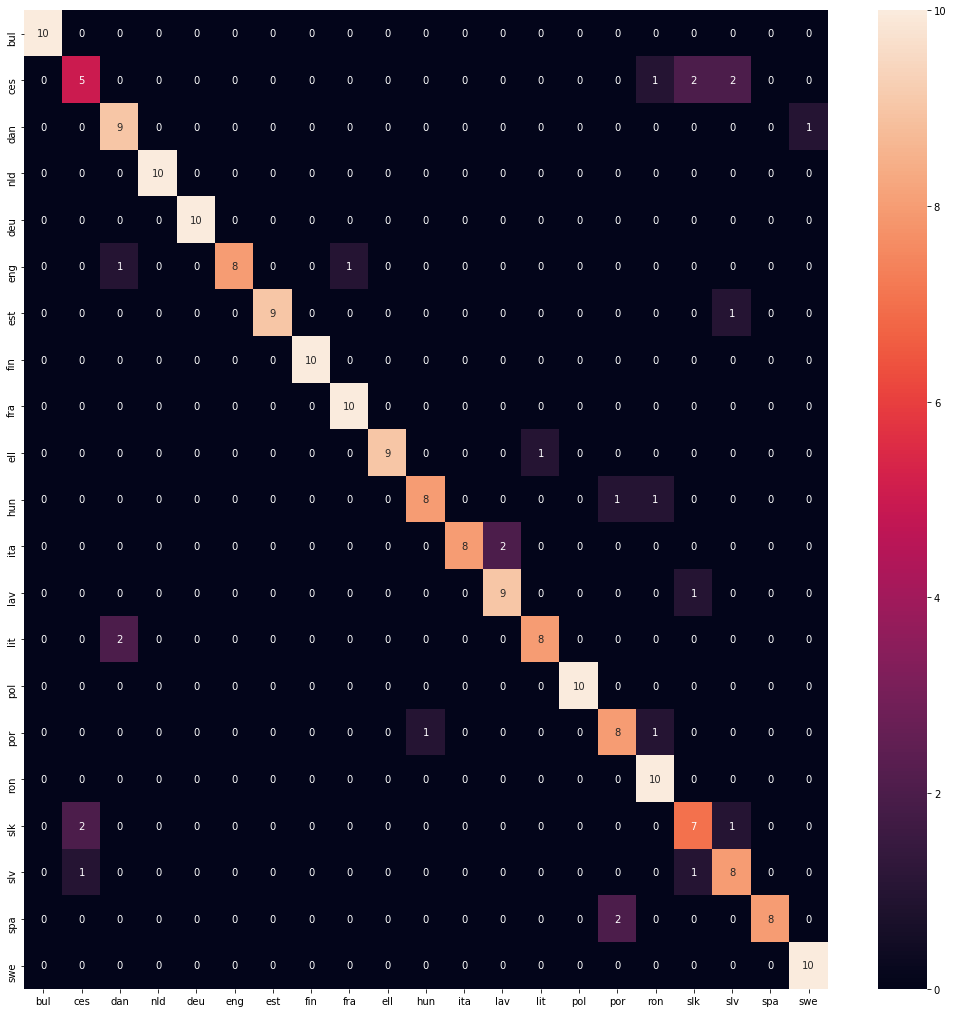

In [133]:
conf_mat= sklearn.metrics.confusion_matrix(GT, PR, labels=None, sample_weight=None)

#plot confusion matrix
%matplotlib inline
df_cm = pd.DataFrame(conf_mat, index = [i for i in Labels_arr], columns = [j for j in Labels_arr])
plt.figure(figsize = (18,18))
sn.heatmap(df_cm, annot=True)